In [1]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from sympy.abc import x, y, z

In [2]:
class input_data:
  def __init__(this, data):
    this.input_data = data.split("\n")
    this.last_used_index = -1
  def get_input(this, question):
    this.last_used_index = this.last_used_index + 1
    if (this.last_used_index >= len(this.input_data)):
      this.input_data.append(input(question))
    else:
      print(f"""{question}{this.input_data[this.last_used_index]}""")
    return(this.input_data[this.last_used_index])

  def read_equation(this):
    expr = this.get_input("Выражение: ")
    expr = expr.replace("^", "**").replace(" ", "")
    left_side = sympy.parse_expr(expr[0:expr.index("=")])
    right_side = sympy.parse_expr(expr[expr.index("=") + 1:])
    return(sympy.Eq(left_side, right_side))

In [3]:
def get_coeff(f, pat=None):
  if (pat == None):
    return(f.subs({x: 0, y: 0, z: 0}))
  return(f.coeff(pat).subs({x: 0, y: 0, z: 0}))

def make_matrix_1(f):
  A = Matrix([
        [get_coeff(f, x ** 2), get_coeff(f, x * y) / 2, get_coeff(f, x * z) / 2],
        [get_coeff(f, x * y) / 2, get_coeff(f, y ** 2), get_coeff(f, y * z) / 2],
        [get_coeff(f, x * z) / 2, get_coeff(f, y * z) / 2, get_coeff(f, z ** 2)]
      ])
  b = Matrix([[get_coeff(f, x) / 2, get_coeff(f, y) / 2, get_coeff(f, z) / 2]])
  c = get_coeff(f)
  X = Matrix([x, y, z])
  text = Latex(f"""{sympy.latex(X.T)} * {sympy.latex(A)} * {sympy.latex(X)} + 2 * {sympy.latex(b)} * {sympy.latex(X)} + {sympy.latex(Matrix([c]))} = {sympy.latex(Matrix([0]))}""")
  surface = {"A": A, "b": b, "c": c, "X": X, "surface": (X.T * A * X + 2 * b * X)[0] + c, "text": text}
  return(surface)

def make_matrix_2(f):
  A = Matrix([
        [get_coeff(f, x ** 2), get_coeff(f, x * y) / 2, get_coeff(f, x * z) / 2, get_coeff(f, x) / 2],
        [get_coeff(f, x * y) / 2, get_coeff(f, y ** 2), get_coeff(f, y * z) / 2, get_coeff(f, y) / 2],
        [get_coeff(f, x * z) / 2, get_coeff(f, y * z) / 2, get_coeff(f, z ** 2), get_coeff(f, z) / 2],
        [get_coeff(f, x) / 2, get_coeff(f, y) / 2, get_coeff(f, z) / 2, get_coeff(f)]
      ])
  X = Matrix([x, y, z, 1])
  text = Latex(f"""{sympy.latex(X.T)} * {sympy.latex(A)} * {sympy.latex(X)} = {sympy.latex(Matrix([0]))}""")
  surface = {"A": A, "X": X, "surface": (X.T * A * X)[0], "text": text}
  return(surface)

def normalize(expr, vars):
  for var in vars:
    a = get_coeff(expr, var ** 2)
    b = get_coeff(expr, var)
    if (a == 0 or b == 0):
      continue
    expr = expr - a * (var ** 2) - b * var + (var * sympy.sqrt(a) + b / (2 * sympy.sqrt(a))) ** 2 - (b ** 2) / (4 * a)
  c = get_coeff(expr)
  display(c)
  for var in vars:
    a = get_coeff(expr, var ** 2)
    b = get_coeff(expr, var)
    if (a == 0):
      expr.subs({var: var - c / b})
      continue
  return(expr)

def to_canonical(surface):
  P = Matrix([])
  for item in surface["A"].eigenvects():
      for i in range(item[1]):
          P = P.row_join(item[2][i].normalized())
  eq = (surface["X"].T * P.T * surface["A"] * P * surface["X"])[0].expand() + 2 * (surface["b"] * P * surface["X"])[0] + surface["c"]
  eq = normalize(eq, [x, y, z])
  surface = {
      "A": P.T * surface["A"] * P, "b": surface["b"] * P, "c": surface["c"], "X": surface["X"], 
      "equation": sympy.Eq(eq, 0)
  }
  return(surface)

# Практическое занятие 17
# Компьютерный практикум по алгебре на Python
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [4]:
user_data = input_data("""4 * (x ^ 2) - 24 * x * y + 8 * sqrt(3) * x * z - 7 * (y ^ 2) + 10 * sqrt(3) * y * z + 3 * (z ^ 2) - 4 = 0""")
eq = user_data.read_equation()
display(Latex(sympy.latex(eq)))

surface1 = make_matrix_1(eq.lhs)
display(surface1["text"])

surface2 = make_matrix_2(eq.lhs)
display(surface2["text"])

display(to_canonical(surface1)["equation"])

Выражение: 4 * (x ^ 2) - 24 * x * y + 8 * sqrt(3) * x * z - 7 * (y ^ 2) + 10 * sqrt(3) * y * z + 3 * (z ^ 2) - 4 = 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

-4

Eq(-20*x**2 + 8*y**2 + 12*z**2 - 4, 0)

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

Выражение: 24 * (x ^ 2) - 4 * sqrt(2) * x * y - 4 * sqrt(2) * x * z + 18 * (y ^ 2) + 12 * (y * z) + 18 * (z ^ 2) - 4 = 0


-4

Eq(12*x**2 + 20*y**2 + 28*z**2 - 4, 0)

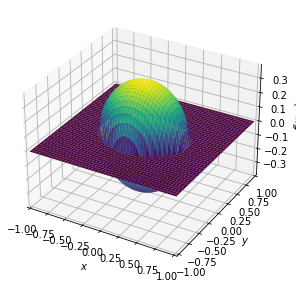

In [5]:
user_data = input_data("""24 * (x ^ 2) - 4 * sqrt(2) * x * y - 4 * sqrt(2) * x * z + 18 * (y ^ 2) + 12 * (y * z) + 18 * (z ^ 2) - 4 = 0""")
eq = user_data.read_equation()
surface = make_matrix_1(eq.lhs)
eq = to_canonical(surface)["equation"]
display(eq)
Z = solve(eq, z)
plot3d(*Z, (x, -1, 1), (y, -1, 1))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

Выражение: (x ^ 2) + (y ^ 2) + 2 * x - 4 * y + 2 * z + 1 = 0


1

Eq(2*x + (y + 1)**2 + (z - 2)**2 - 4, 0)

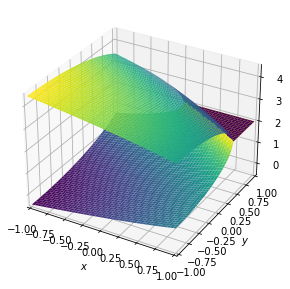

In [6]:
user_data = input_data("""(x ^ 2) + (y ^ 2) + 2 * x - 4 * y + 2 * z + 1 = 0""")
eq = user_data.read_equation()
surface = make_matrix_1(eq.lhs)
eq = to_canonical(surface)["equation"]
display(eq)
Z = solve(eq, z)
plot3d(*Z, (x, -1, 1), (y, -1, 1))

### Индивидуальное задание.
Привести уравнение поверхности второго порядка $- 4 x^{2} - 16 \sqrt{2} x y - 16 \sqrt{2} x z + 2 y^{2} - 12 y z + 2 z^{2} - 4$ к каноническому виду. Построить график.
Вариант N 2

$$- 109 x^{2} - 44 \sqrt{3} x y - 38 \sqrt{3} x z + 36 y^{2} + 132 y z - 71 z^{2} + 16 = 0$$

Выражение: -863 * (x ^ 2) - 96 * sqrt(6) * x * y - 74 * sqrt(3) * x * z + 352 * (y ^ 2) + 288 * sqrt(2) * y * z - 789 * (z ^ 2) + 400 = 0


400

Eq(-900*x**2 - 800*y**2 + 400*z**2 + 400, 0)

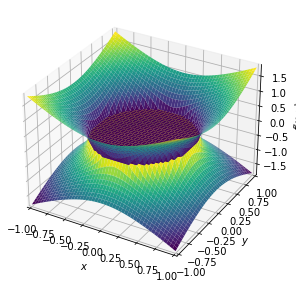

In [7]:
user_data = input_data("""-863 * (x ^ 2) - 96 * sqrt(6) * x * y - 74 * sqrt(3) * x * z + 352 * (y ^ 2) + 288 * sqrt(2) * y * z - 789 * (z ^ 2) + 400 = 0""")
eq = user_data.read_equation()
surface = make_matrix_1(eq.lhs)
eq = to_canonical(surface)["equation"]
display(eq)
Z = solve(eq, z)
plot3d(*Z, (x, -1, 1), (y, -1, 1))

Выражение: -13631 * (x ^ 2) + 1080 * sqrt(6) * x * y - 1746 * sqrt(91) * x * z - 7850 * (y ^ 2) - 360 * sqrt(546) * y * z + 10231 * (z ^ 2) = -3750


0

Eq(-16250*x**2 - 8750*y**2 + 13750*z**2, 0)

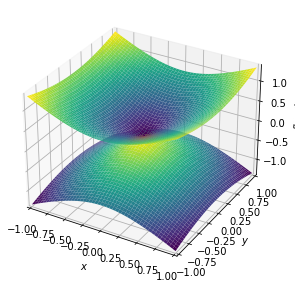

In [8]:
user_data = input_data("""-13631 * (x ^ 2) + 1080 * sqrt(6) * x * y - 1746 * sqrt(91) * x * z - 7850 * (y ^ 2) - 360 * sqrt(546) * y * z + 10231 * (z ^ 2) = -3750""")
eq = user_data.read_equation()
surface = make_matrix_1(eq.lhs)
eq = to_canonical(surface)["equation"]
display(eq)
Z = solve(eq, z)
plot3d(*Z, (x, -1, 1), (y, -1, 1))